# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
#Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import the required libraries for data pre-processing and model building
from sklearn.model_selection import train_test_split, GridSearchCV

# To be used for data scaling
from sklearn.preprocessing import MinMaxScaler

# To impute missing values
from sklearn.impute import SimpleImputer, KNNImputer

# Classifical Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#To evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, PrecisionRecallDisplay, precision_recall_curve

import warnings as warn
warn.filterwarnings("ignore")

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [2]:
#Upload and read the dataset
loanData = pd.read_csv("hmeq.csv")

In [3]:
#Check info about the dataset
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [4]:
#Shape of the dataset
loanData.shape

(5960, 13)

In [5]:
#Make a copy of the original dataset
orginial_loanData=loanData.copy()

<font color='blue'>Data structure and types</font>
* There are 12 independent features to predict the target variable whether a client will default.
* Out of 12 features, 2 features are categorical: reason and job. Rest are numerical continuous features
* There are a toal of 5960 observations in the dataset
* Except for loan amount, rest of the features have some missing values

In [6]:
#Check the count of missing values
loan_features = loanData.columns
for i in loan_features:
  print("Missing values for ", i, ":", 5960- loanData[i].value_counts().sum())


Missing values for  BAD : 0
Missing values for  LOAN : 0
Missing values for  MORTDUE : 518
Missing values for  VALUE : 112
Missing values for  REASON : 252
Missing values for  JOB : 279
Missing values for  YOJ : 515
Missing values for  DEROG : 708
Missing values for  DELINQ : 580
Missing values for  CLAGE : 308
Missing values for  NINQ : 510
Missing values for  CLNO : 222
Missing values for  DEBTINC : 1267


In [7]:
#Check for duplicated values
loanData.duplicated().sum()

0

<font color='blue'>Missing & Duplicated Values</font>
* Debt to income ratio has maximum number of 1267 missing values followed by number of derogatory reports (708) and delinquent credit lines(580)
* Except for the loan amount, every other feature has some missing values
* There are no duplicate values in the dataset

In [8]:
#Summary Stats for numerical continous features
loanData.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [9]:
#Summary Stats for categorical features
loanData.describe(exclude=np.number).T

,count,unique,top,freq
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


In [10]:
#Find % of top occurences in categorical features
loanData.describe(exclude=np.number).T['freq']/loanData.describe(exclude=np.number).T['count']

REASON    0.688157
JOB       0.420349
dtype: object

<font color='blue'>Observations from Summary Statistics</font>

*   20% of the clients defaulted on their loan. This also shows that the dataset is imbalanced
*   The average loan amount is \$18,608 and median is \$16,300 with loans ranging from as low as \$1100 to upto ~$90K
*  The average mortgage due is \$73,760 and median is \$65,019 but has a big variance from ranging as low as \$2063 to ~\$400K
*  The average value of the property is \$101776, median is \$89,235 and like mortgage has a big variance with property ranging from as low as \$8000 to ~\$855K
*  The average client has 9 years of job with some client having even 41 years of experience
*  The numer of derogatory reports range from 0 to 10 across the clients dataset
*  The average age of credit history is ~180 months/15 years with range from 0 to as high as 1168 months/97 years
*  The average and median number of recent credit inqueries is 1 with a maximum of upto 17 queries
* The average and median number of credit lines is ~21 with a minimum of 21 lines and a maximum of 71 credit lines
* The average/median debt to income ratio is 33
* Around ~70% of the clients have taken out loan for debt consilation reasons
* Around ~42% of the clients have some unknown job



## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


***Non-categorical Features***

In [11]:
#function to plot histogram and boxplot together for all the features
def hist_boxplot(feature, figsize=(20,10),kde=False):


    figure, axs = plt.subplots(nrows=2,ncols=1, figsize=figsize, sharex=True)

    #Plot histogram
    sns.histplot(x=feature, kde=kde, ax=axs[1])

    #Plot boxplot
    sns.boxplot(x=feature, showmeans=True, ax=axs[0], color='y')

    #Plot vertical lines in histogram to display mean and median
    plt.axvline(x=feature.mean(),color='green', linestyle='--')
    plt.axvline(x=feature.median(),color='black',linestyle='--')

    plt.show()

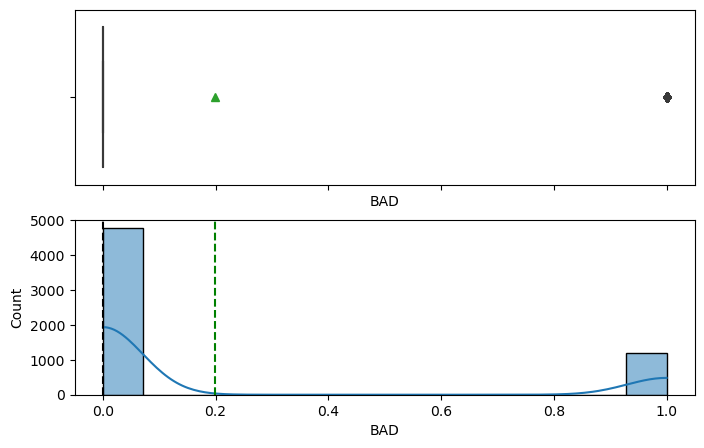

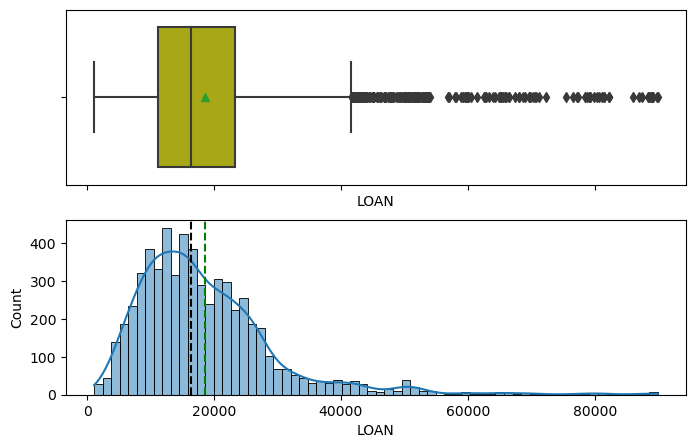

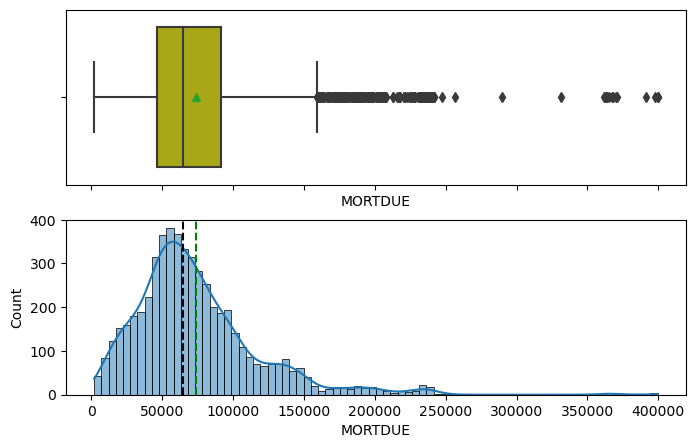

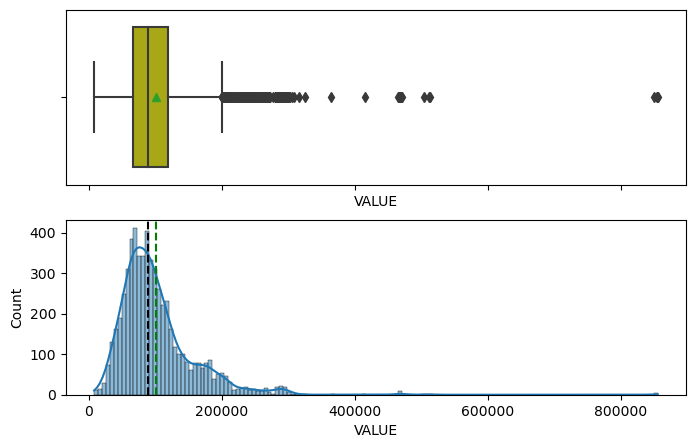

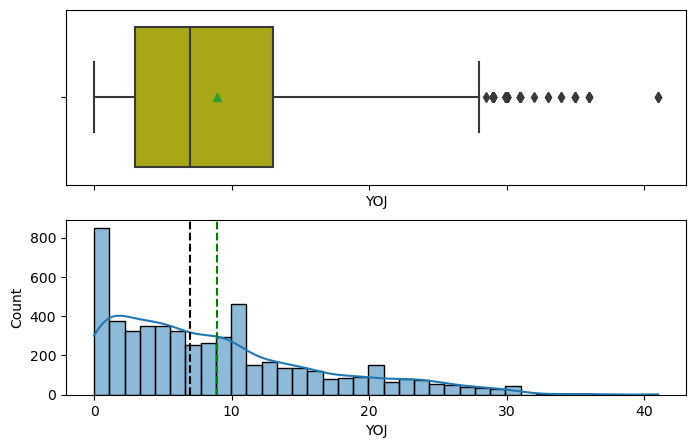

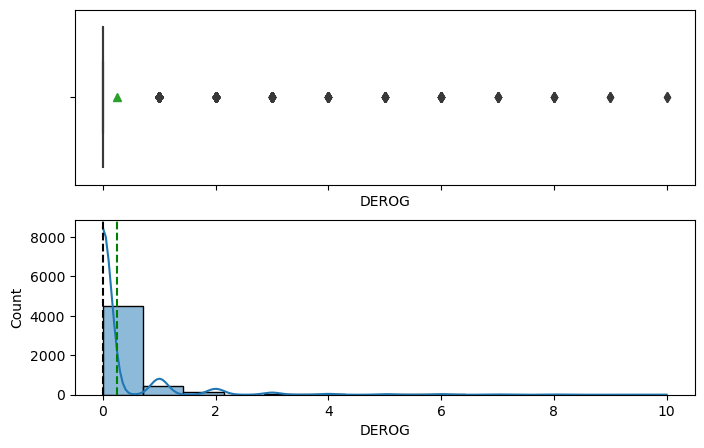

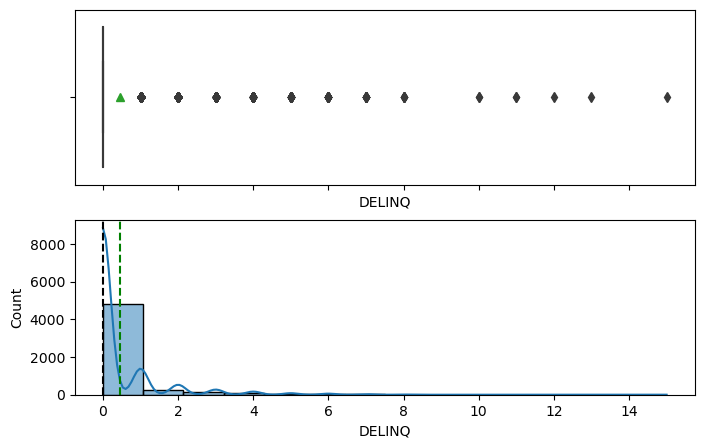

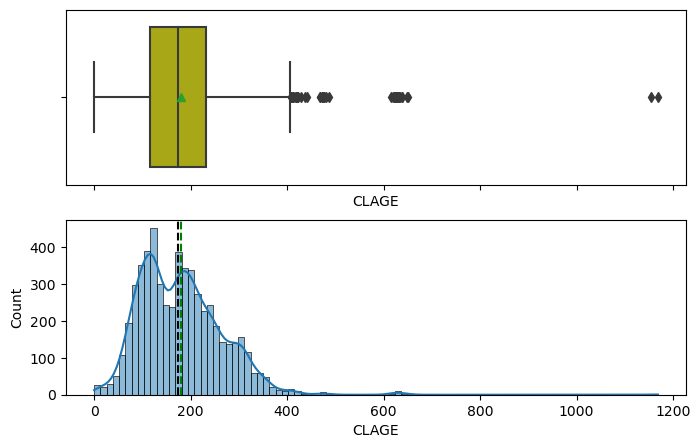

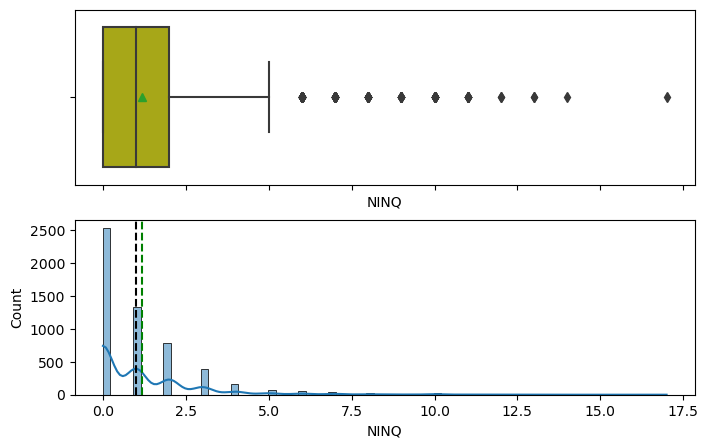

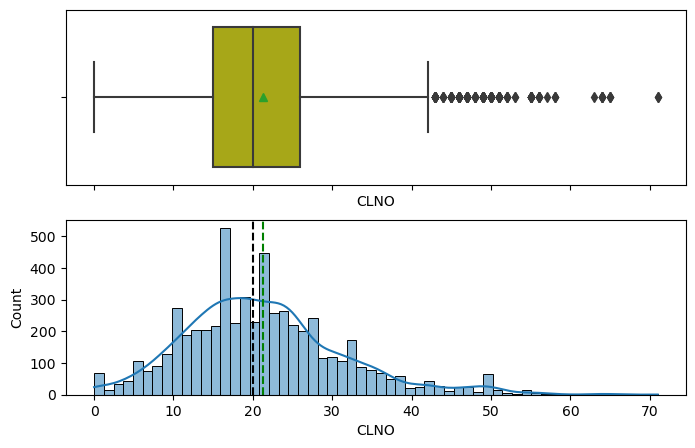

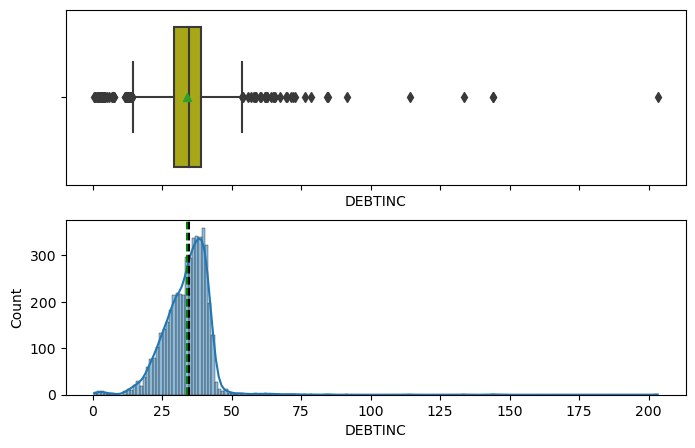

In [12]:
#Plot numerical variables
num_Features=loanData.select_dtypes(include=np.number)
for feature in num_Features:
  hist_boxplot(loanData[feature], figsize=(8,5), kde=True)


<font color='blue'>Non-Categorical Features Observations</font>
*   Loan, Mortgage due and value of the property, all 3 features have a number of outliers but ignoring the outliers, all 3 features are approximately normally distributed
*   Number of years at job can be approximated by chi-square distribution with some degrees of freedom. Avg years is around 10
*  The number of major derogatory reports and deliquent credit lines are mostly 0 with few outliers, this is consistent with what was observed in the summary statistics
*  The oldest credit age shows 2 modes in the distribution, but can be approximated with a normal distribution with a mean & median age of 180 months (15 yrs). This feature also exhibit outliers going upto as high as credit age of ~1200 months
*  It is hard to put a distribution on number of recent credit inquries than the average value of 1 (with the exception for some outliers) that was observed in the summary stats
* The number of credit lines shows more or less normal distribution with mean around 20
* The debt-to-income ratio also is more or less normally distributed with some outliers



***Categorical Features***

In [13]:
#Function to plot count and proportion plots for categorical features
def count_proportion_plot(data,feature, figsize=(10,5)):
  ''' Function to plot custom count plots for categorcal features
      along with % proportions.
      Input: Dataframe, feature to plot, figure size
  '''

  #Get the values count and sort it in ascending order
  count = data[feature].value_counts().sort_values(ascending=False)

  # Get the proportions of each unique value and sort it in asc order
  count_prop = data[feature].value_counts()/loanData['REASON'].value_counts().sum()
  count_prop=count_prop.sort_values(ascending=False)

  #plot countplot for the feature
  plt.figure(figsize=figsize)
  sns.barplot(data=data[feature].value_counts())

  #For the number of values, annote % in the plot
  for i in np.arange(0,count_prop.shape[0]):
    prop = str(round(count_prop[i]*100)) + "%"
    plt.annotate(prop, (i,count[i]+10))

  plt.show()

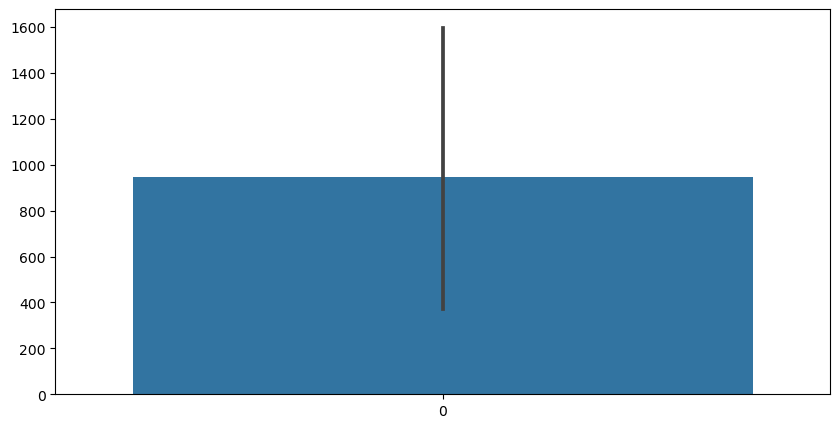

In [14]:
#Plot count & proportion plot for JOB
count_proportion_plot(loanData,'JOB')

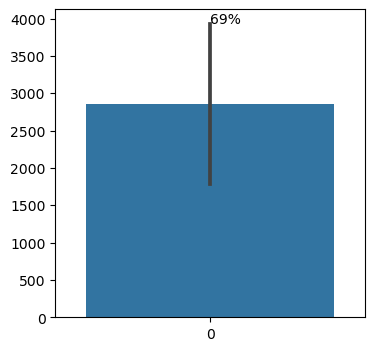

In [15]:
#Plot count & proportion plot for REASON
count_proportion_plot(loanData,'REASON', figsize=(4,4))


<font color='blue'>Categorical Features Observations</font>
*   42% of the clients have some unknown job, 22% of the clients are executives, 17% have some office jobs, 13% are managers, 3% are self-employed, 2% are in sales.
*   As seen in the stats summary, majority of the clients which is around 69% took loan for debt consolidation i.e. paying off other debts than for home, and only 31% of the clients took loan for home improvements.



### **Bivariate Analysis**


***Bivariate Analysis - Categorical & Target***

In [16]:
#Function to plot heatmap and barplot for the bivariate analysis
def plot_bivariate(x_feature, y_target, figsize=(10,5)):
  ''' Plot 3 subplots for bivariate analysis between a feature and the target variable
      1st subplot: Heatmap for the count in the crosstab
      2nd subplot: Same heatmap as 1st one but normalized
      3rd subplot: Heatmap with % across default and non-default clients, respectively
   '''
  #get the subplots
  figure, axs = plt.subplots(nrows=1, ncols=3, figsize=figsize)

  #Get the crosstab
  crosstab_df=pd.crosstab(index=x_feature, columns=y_target)

  #plot heatmap from the crosstab
  sns.heatmap(crosstab_df,annot=True, fmt="0.2f", xticklabels=['NON-DEFAULT','DEFAULT'],cmap='coolwarm', ax=axs[0])

  #plot heatmap from the Normalized crosstab
  sns.heatmap(pd.crosstab(index=x_feature, columns=y_target, normalize=True),annot=True, fmt="0.2f", xticklabels=['NON-DEFAULT','DEFAULT'],cmap='Greens', ax=axs[1])

  #Plot heatmap with % proportions i.e. normalized across the columns (Default vs Non-Default)
  prop_default=crosstab_df.div(crosstab_df.sum(axis=0), axis=1)
  sns.heatmap(prop_default,annot=True, fmt="0.2f", xticklabels=['NON-DEFAULT','DEFAULT'],cmap='Blues', ax=axs[2])


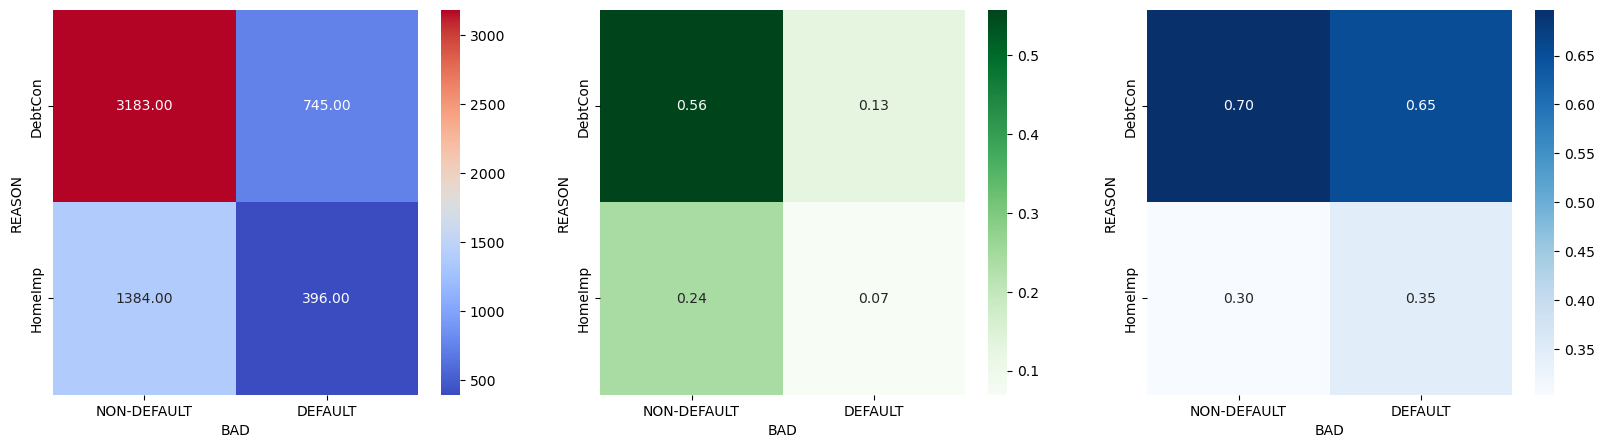

In [17]:
plot_bivariate(loanData['REASON'], loanData['BAD'], figsize=(20,5))

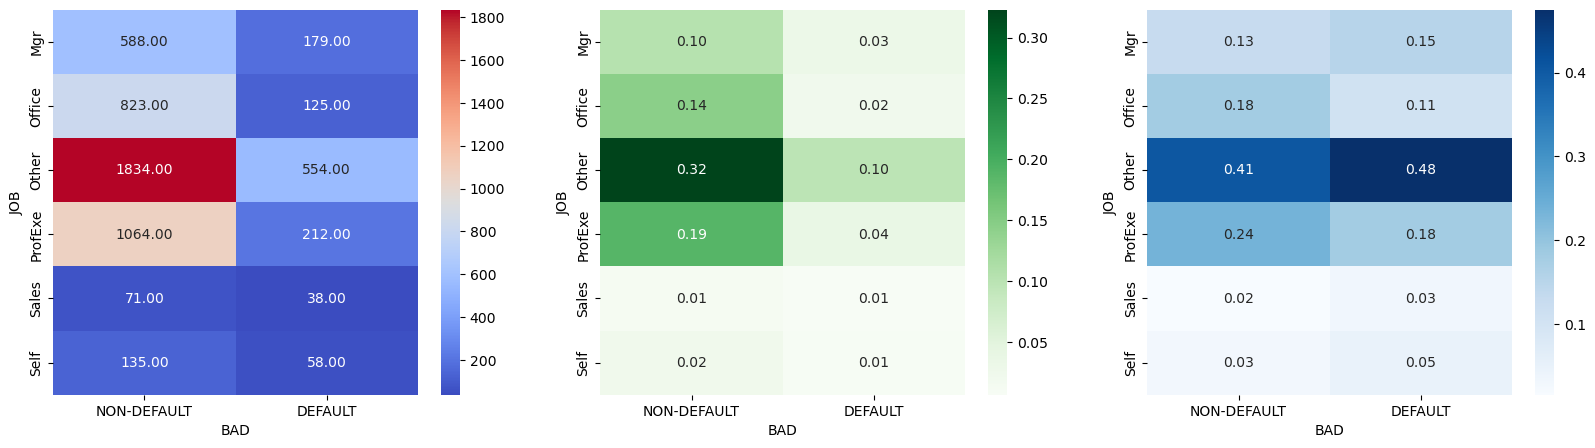

In [18]:
plot_bivariate(loanData['JOB'], loanData['BAD'], figsize=(20,5))

<font color='blue'>Relation between Default and Categorical Features</font>
*   Overall, 13% of clients who defaulted had taken loan for debt consolidation, while 7% had taken loan for home improvement reasons
*   Of the clients who defaulted, 65% had taken it for debt consolidation (majority) and around 35% for home improvements
*  Overall, 10% of clients defaulted and had 'Other' as job i.e. some unknown job. This was followed by 4% of Execs and 3% of Manager clients defaulting.
* Of the clients who defaulted, 48% of them had 'Other' job followed by 18% of them execs and 15% managers. The lowest proportion of default among all job profiles is seen with 'Sales' people at 3%



***Bivariate Analysis - Continuous & Target***

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


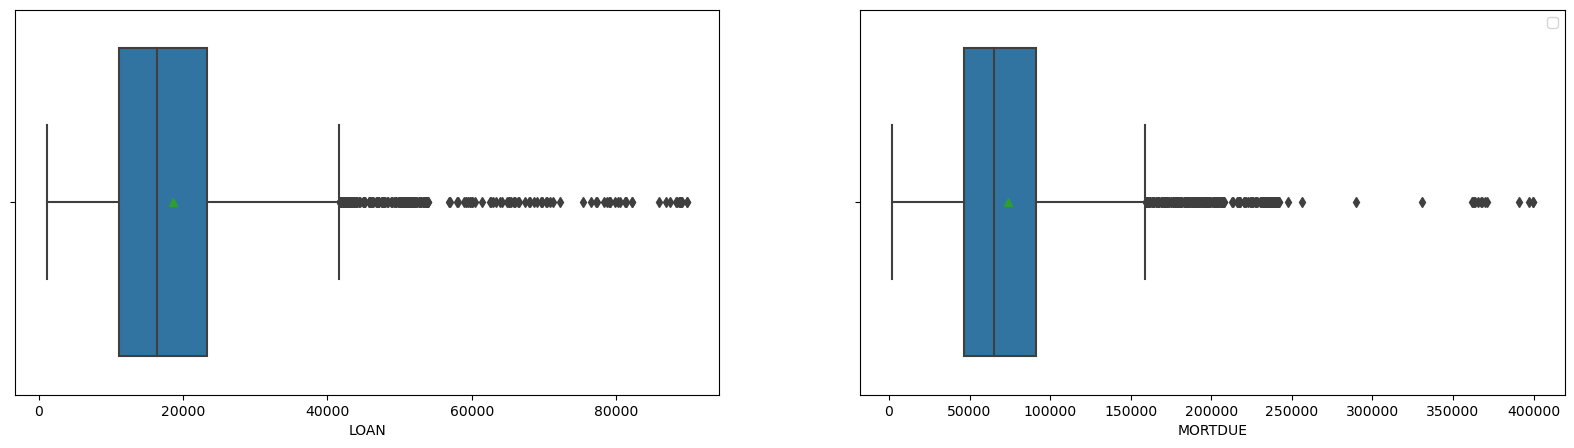

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


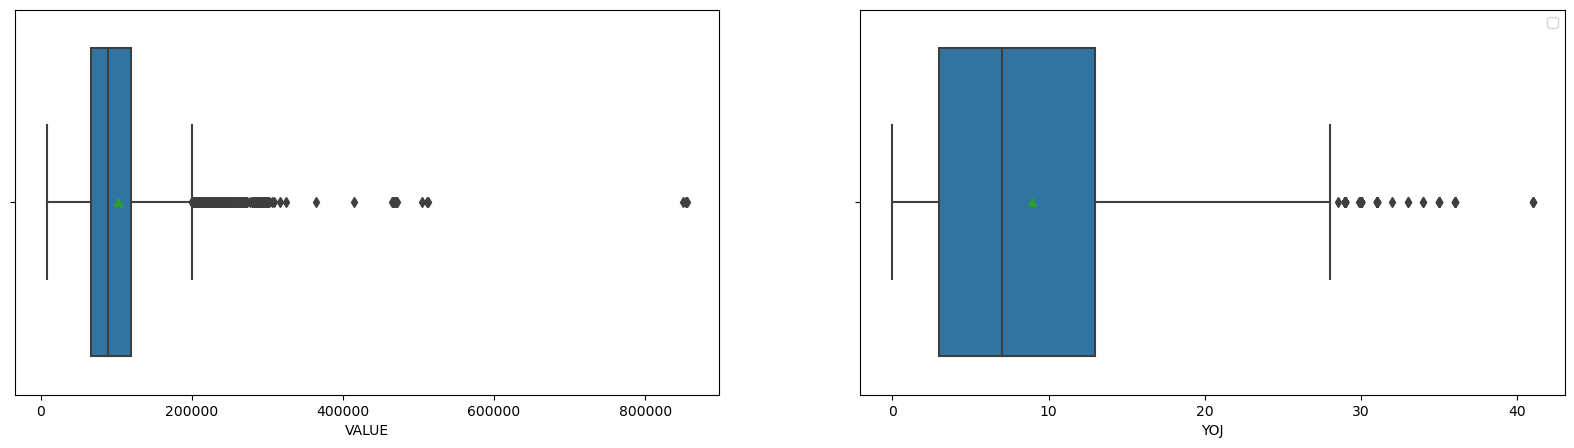

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


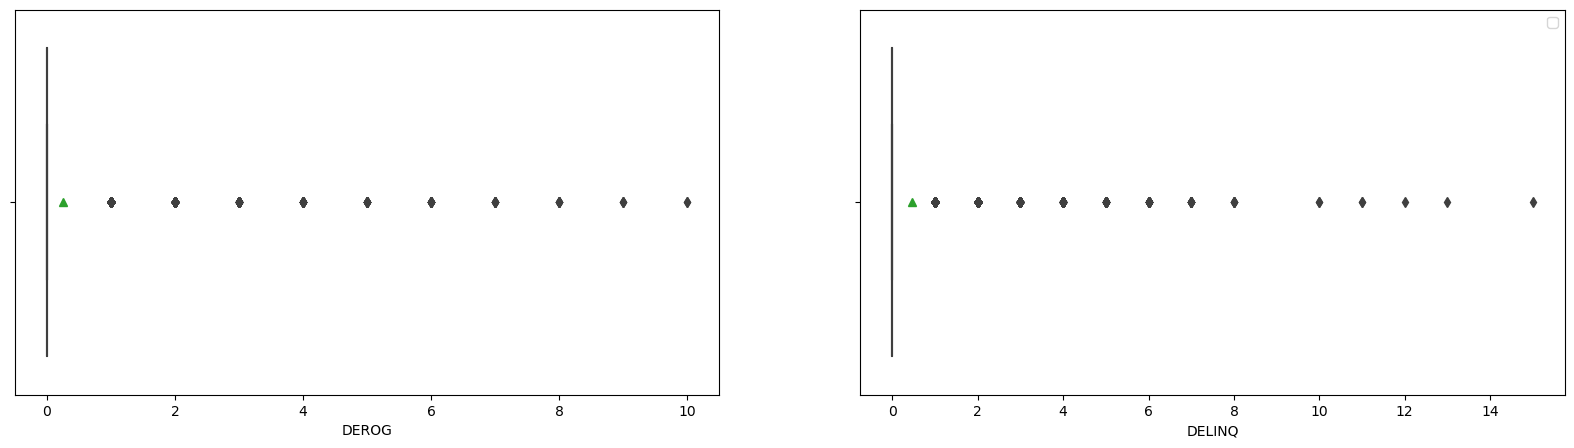

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


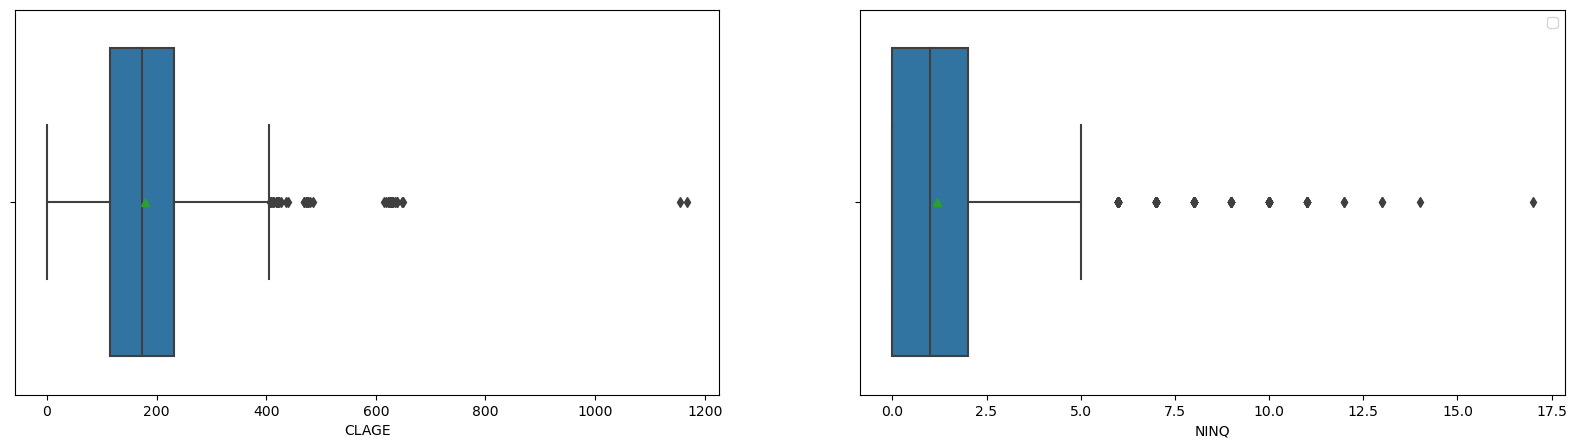

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


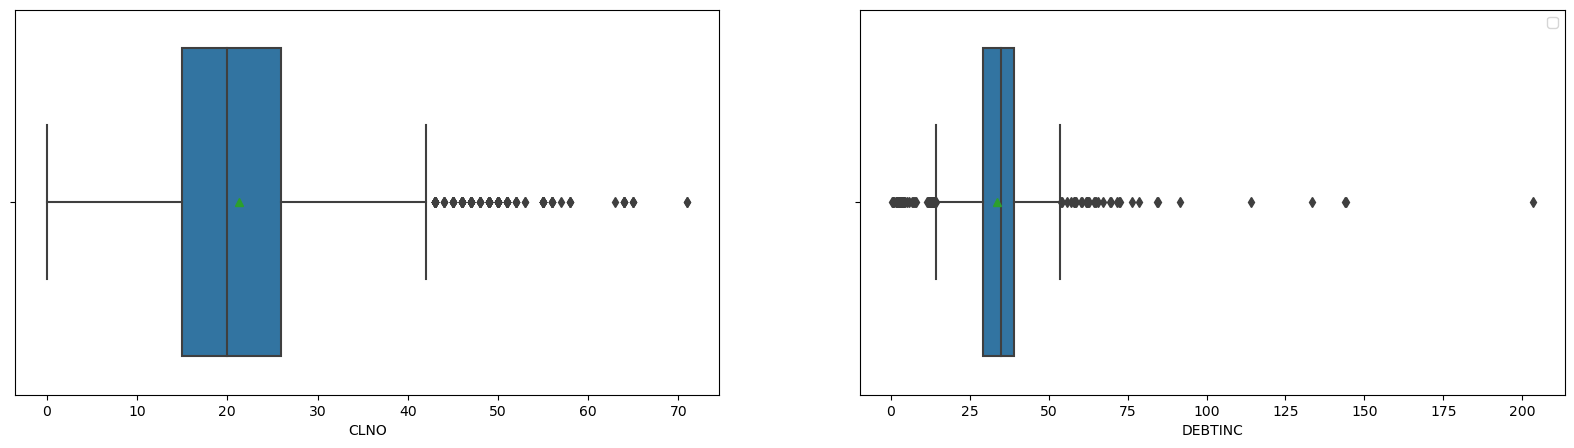

In [19]:
#Get the list of continuous variables
cont_features = loanData.select_dtypes(include=np.number).columns.to_list()

#Plot boxplot of default outcome vs each continuous feature
for i in np.arange(1,len(cont_features), 2):
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
  plt.legend(loc='upper right')
  sns.boxplot(data=loanData, x=cont_features[i], hue='BAD', ax=axs[0], showmeans=True)
  sns.boxplot(data=loanData, x=cont_features[i+1], hue='BAD', ax=axs[1], showmeans=True)
  plt.show()



<font color='blue'>Relation between Default and Continuous Features</font>
*   Loan Amount & Existing mortgage: There does not seem to much distinction between average/median loan amount as well as average/median mortgage amount between clients who defaulted and who did not. Both loan and mortgage amounts show a number of outliers for both the categories of the clients but there is no clear pattern observed in the 2 outlier categories
*   Value of the property: Average property value again is not too different between profiles of the clients who defaulted, and who didn't. However, there are some outlier clients with property value greater than /$800K who defaulted.
* Years at job: Average and median years at job for defaulting clients is slighter lower than the ones who didnt default. Additionally, there is an outlier client with more than 40 years of experience who defaulted.
* Major Derogatory reports : Clients who defaulted clearly have on an avergae 1 or more than one major derogatory reports. Some outlier clients with more than 1 major deorgatory reports who didnt default are also observed.
* Delinquent Credit Lines : From the box plot, it can be obserbed clients who defaulted cleary have 1 or more deliniquent credit lines.
* Oldest Credit Age: Avg/Median credit age of clients who defaulted is slightly lower than the ones who didn't. There are also 2 outlier clients with oldest credit of ~15 years who defaulted.
* Recent Credit inquiries: Clients who defaulted have a higher number of average credit inquiries.
* Number of credit lines: Though the average & median number of credit lines is same across defaulting and non-defaulting cients, there are outlier clients with more than 60 credit lines who defaulted
* Debt-to-income ratio : The clients who defaulted have a higher debt-to-income ratio with some clients who defaulted with debt-to-income ratio more than 60

From the above box plots, number of derogatory reports, number of delinquent credit lines and debt-to-income ratio are top 3 features which shows a pattern of being higher for defaulting clients than who didnot default.



### **Multivariate Analysis**

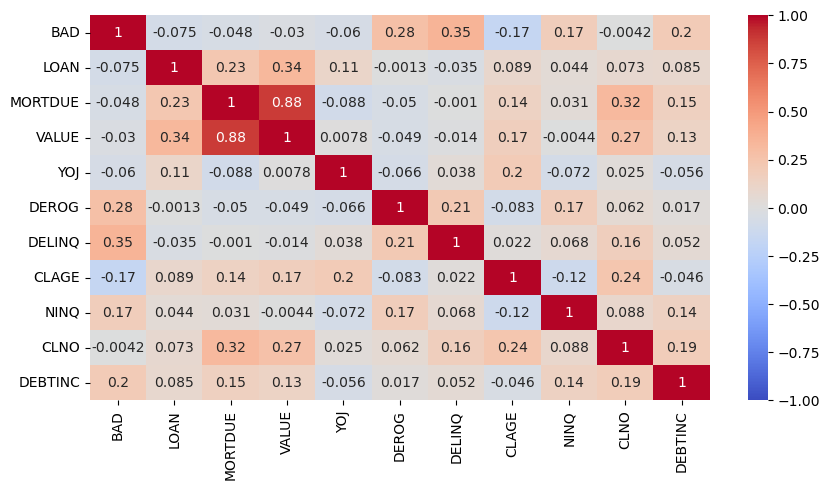

In [20]:
#Plot correlation across continous numerical features
plt.figure(figsize=(10,5))
sns.heatmap(loanData.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

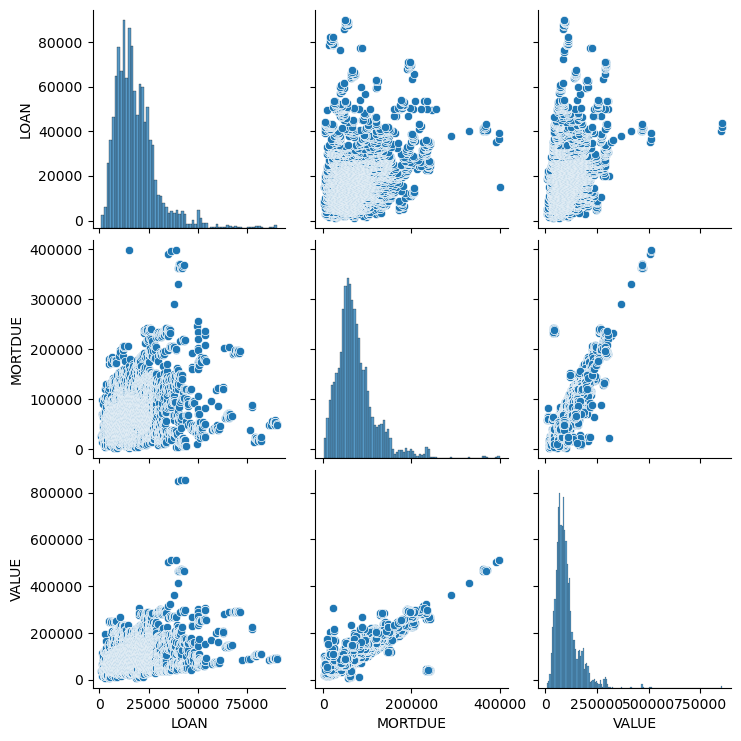

In [21]:
#Pairplot between seemingly related numerical continuous features
sns.pairplot(loanData[['LOAN', 'MORTDUE', 'VALUE']])

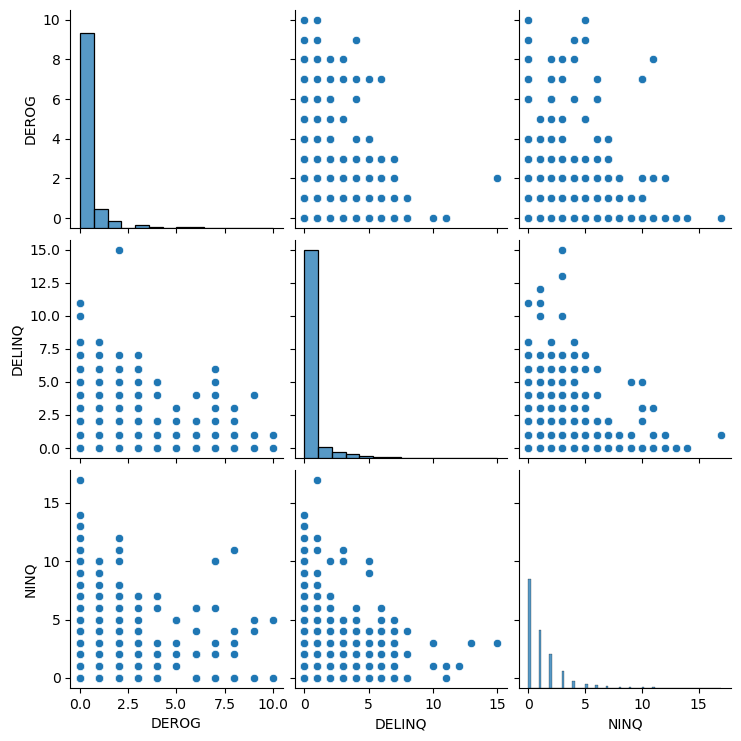

In [22]:
#Pairplot between 3 seemingly related features
sns.pairplot(loanData[['DEROG','DELINQ','NINQ']])

<font color='blue'>Multivariate Observations</font>\
From heatmap:
* There is a high correlation of 0.88 between existing mortgage and value of the property, which makes sense. These 2 features exhibit multi-collinearity
* Consistent with the bivariate analysis, above heatmap also shows the maximum positive correlation of default is with **number of delinquent credit lines, number of major derogatory reports and debt-to-income ratio**
* The default on a loan also exhibits negative correlation with oldest credit line age, which means if a client has long credit history, there is a slightly lower probablity of defaulting.
* The default rate also shows some negative correlation with loan amount and mortgage amount, which means if the loan amount and mortgage due is higher, there is a slightly less chance of defaulting. But since the correlation values are near to 0, its hard to identify any pattern here.

From pairplots:
* There is a clear linear relationship between mortgage due and value of the property
* There is some increasing variance/hetroskedacity in amount of loan approved vs. mortgage due. Same is observed between loan approved and value of the property
* Though one would expect some positive correlation between number of major derogatory reports, number of deliquent credit lines and number of recent inquires, its not evident from the empirical data. Outliers could impact the pairplots

Overall, except for multi-colinearity observed in mortgage due and value of the property, correlations are pretty low between rest of the features.

##<font color='blue'> **Important Insights from EDA** </font>


*   Debt-to-income ratio, number of major derogatory reports and number of delinquent credit lines have the most missing values. At the same time, same 3 features also exhibit maximum positive correlation with default rate, which means a client with high debt-to-income ratio and more number of derogatory reports and deliquent credit lines is more likely to default
*   Default rate has some negative correlation with age of the credit history, which means a client with a longer credit history is less likely to default.
* Loan amount, mortgage due, value of the property, credit age, debt-to-income ratio - all have many outliers but can still be approximated using a normal or skewed-t distribution
* There is considerable number of missing values and outliers in number of derogatory reports and number of deliquent credit lines, but the average/median value is 0. Since these two features exhibit positive correlation with default rate, imputing missing values and treating outliers can impact models built.
* Most of the clients have provided their job as 'Other' and most of the clients have taken loan for other reasons than home improvement.
* There is a high correlation of 88% between mortgage due and value of the property, this makes sense, however the multi-colinearity of these two variables can impact regression models



# Data Pre-processing

In [23]:
#Divide dataset into features and target
X=loanData.iloc[:,1:]
y=loanData.iloc[:,0]

## *Treating Missing Values*

In [24]:
#Get the missing values for X
X.isna().sum()

LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [25]:
#Fill in the missing categorical features with mode

#Fill in the missing JOB as 'OTHER' which is most frequent job given for the clients
X['JOB'] = X['JOB'].fillna('Other')

#Fill in the missing REASON as 'DebtCon' which is the most frequent reason for taking loan
X['REASON']=X['REASON'].fillna('DebtCon')


***Split the data into train and test set before imputing to avoid data leakage***




In [26]:
#Before filling in the numerical continuous features, we will split the dataset into train and test dataset
#Train and test dataset will be imputed separately to prevent any data leakage
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=7, stratify=y)

In [27]:
#Fill in the missing numerical continuous features with median

#Mortgage and property value didnt exhibit a significant correlation with the default rate as well as can be approximated using a normal or skewed-t distribution
#Hence, both can be imputed using median

#Backfill the training dataset
'''X_train['MORTDUE']=X_train['MORTDUE'].fillna(X_train['MORTDUE'].median())
X_train['VALUE']=X_train['VALUE'].fillna(X_train['VALUE'].median())

#Backfill the test dataset
X_test['MORTDUE']=X_test['MORTDUE'].fillna(X_test['MORTDUE'].median())
X_test['VALUE']=X_test['VALUE'].fillna(X_test['VALUE'].median())'''


"X_train['MORTDUE']=X_train['MORTDUE'].fillna(X_train['MORTDUE'].median())\nX_train['VALUE']=X_train['VALUE'].fillna(X_train['VALUE'].median())\n\n#Backfill the test dataset\nX_test['MORTDUE']=X_test['MORTDUE'].fillna(X_test['MORTDUE'].median())\nX_test['VALUE']=X_test['VALUE'].fillna(X_test['VALUE'].median())"

In [28]:
#For DEROG and DELINQ, its hard to put any distribution on it as both features have many outliers
#Get mean, median for DEROG and DELINQ by JOB, REASON
pd.pivot_table(data=loanData, values='DEROG', index='REASON', columns='JOB', aggfunc=['mean', 'median'])

mean                                                   median  \
JOB           Mgr    Office     Other   ProfExe     Sales      Self    Mgr   
REASON                                                                       
DebtCon  0.336694  0.122936  0.300351  0.199742  0.333333  0.257143    0.0   
HomeImp  0.246667  0.213483  0.294299  0.135204  1.250000  0.187500    0.0   

                                         
JOB     Office Other ProfExe Sales Self  
REASON                                   
DebtCon    0.0   0.0     0.0   0.0  0.0  
HomeImp    0.0   0.0     0.0   1.0  0.0

In [29]:
pd.pivot_table(data=loanData, values='DELINQ', index='REASON', columns='JOB', aggfunc=['mean', 'median'])

mean                                                   median  \
JOB           Mgr    Office     Other   ProfExe     Sales      Self    Mgr   
REASON                                                                       
DebtCon  0.464078  0.528897  0.406768  0.429463  0.322581  0.708333    0.0   
HomeImp  0.875000  0.341727  0.434515  0.411028  0.000000  0.435644    0.0   

                                         
JOB     Office Other ProfExe Sales Self  
REASON                                   
DebtCon    0.0   0.0     0.0   0.0  0.0  
HomeImp    0.0   0.0     0.0   0.0  0.0

<font color='green'>From the above pivot tables, it can be concluded that on an average, clients with job in 'Sales' and who have taken loan for home improvement, have 1 major derogatory report, while rest can be assumed to be 0 on an average.
Number of delinquencies can be assumed to be 0 for all job types and for all reasons</font>

In [30]:
#Check if there are any missing DEROG values when Job is 'Sales' and Reason is 'HomeImp'
idx_criteria = (loanData['DEROG'].isna()) & (loanData['JOB']=='Sales')
loanData[idx_criteria]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1718,0,12000,87000.0,101200.0,DebtCon,Sales,13.0,NaN,2.0,151.133333,1.0,18.0,NaN
1770,0,12100,90917.0,102400.0,DebtCon,Sales,11.0,NaN,2.0,159.874518,0.0,17.0,33.453728
2195,0,13600,89937.0,110986.0,DebtCon,Sales,14.0,NaN,2.0,146.718742,1.0,17.0,33.747116
2377,0,14300,94062.0,102052.0,DebtCon,Sales,14.0,NaN,2.0,133.378109,1.0,17.0,35.716612
2520,0,15000,93226.0,108149.0,DebtCon,Sales,11.0,NaN,1.0,152.797691,1.0,17.0,34.250266
2620,0,15000,89165.0,106392.0,DebtCon,Sales,12.0,NaN,2.0,166.085018,0.0,17.0,35.033103
2744,0,15500,93730.0,106841.0,DebtCon,Sales,13.0,NaN,1.0,132.820571,0.0,18.0,33.292974
2814,0,15800,91095.0,109401.0,DebtCon,Sales,12.0,NaN,1.0,154.360183,0.0,17.0,33.526271
4229,1,22000,124000.0,155000.0,DebtCon,Sales,1.0,NaN,7.0,130.300000,NaN,55.0,NaN
5594,1,37000,93378.0,145000.0,DebtCon,Sales,15.0,NaN,2.0,368.700000,1.0,27.0,NaN


<font color='green'>There are no clients with missing Derogatory reports count and who have taken loan for home improvement. That means all missing DEROG and DELINQ values can be imputed with median value of 0</font>

In [31]:
#Fill in DEROG and DELINQ with the median values
#Backfill the training dataset
'''X_train['DEROG']=X_train['DEROG'].fillna(X_train['DEROG'].median())
X_train['DELINQ']=X_train['DELINQ'].fillna(X_train['DELINQ'].median())

#Backfill the test dataset
X_test['DEROG']=X_test['DEROG'].fillna(X_test['DEROG'].median())
X_test['DELINQ']=X_test['DELINQ'].fillna(X_test['DELINQ'].median())'''

"X_train['DEROG']=X_train['DEROG'].fillna(X_train['DEROG'].median())\nX_train['DELINQ']=X_train['DELINQ'].fillna(X_train['DELINQ'].median())\n\n#Backfill the test dataset\nX_test['DEROG']=X_test['DEROG'].fillna(X_test['DEROG'].median())\nX_test['DELINQ']=X_test['DELINQ'].fillna(X_test['DELINQ'].median())"

In [32]:
#check if missing values are gone for above imputed columns
print(X_train.isna().sum())
print(X_test.isna().sum())

LOAN         0
MORTDUE    364
VALUE       73
REASON       0
JOB          0
YOJ        357
DEROG      488
DELINQ     398
CLAGE      212
NINQ       366
CLNO       150
DEBTINC    877
dtype: int64
LOAN         0
MORTDUE    154
VALUE       39
REASON       0
JOB          0
YOJ        158
DEROG      220
DELINQ     182
CLAGE       96
NINQ       144
CLNO        72
DEBTINC    390
dtype: int64


In [33]:
#Get median for YOJ by JOB, REASON
pd.pivot_table(data=loanData, values='YOJ', index='REASON', columns='JOB', aggfunc=['median'])

median                                
JOB        Mgr Office Other ProfExe Sales Self
REASON                                        
DebtCon    8.0    5.0   8.0     8.0   4.0  5.0
HomeImp    8.0   10.0   7.0     7.0   4.0  7.0

<font color='green'> We observe median years at job can vary by kind of job. While median years at job does not vary a lot by the reason for the loan, we do observe median years for clients with job as 'Office' is 5 and 10 for debt consolidation and home improvement, respectively </font>

In [34]:
#Check if there are any missing years of job when JOB is 'Office'
idx_criteria = (loanData['YOJ'].isna()) & (loanData['JOB']=='Office')
filtered_loan=loanData[idx_criteria]
pd.crosstab(index=filtered_loan['REASON'], values=filtered_loan['BAD'], columns=filtered_loan['JOB'], aggfunc='count')

JOB,Office
REASON,
DebtCon,9
HomeImp,26


<font color='green'>There are 9 clients with missing YOJ who have some Office job but taken loan for debt consolidation. On the other hand, there are 26 clients who have missing YOJ and have Office job but taken loan for home improvement reasons </font>

In [35]:
#Get median for CLAGE by JOB, REASON
pd.pivot_table(data=loanData, values='CLAGE', index='REASON', columns='JOB', aggfunc=['median'])

median                                                  \
JOB             Mgr      Office       Other     ProfExe       Sales   
REASON                                                                
DebtCon  175.570979  167.657981  152.202235  190.800000  141.268671   
HomeImp  162.637297  175.082704  168.666667  177.854846  156.625882   

                     
JOB            Self  
REASON               
DebtCon  178.951539  
HomeImp  192.226177

In [36]:
#Get median for NINQ by JOB, REASON
pd.pivot_table(data=loanData, values='NINQ', index='REASON', columns='JOB', aggfunc=['median'])

median                                
JOB        Mgr Office Other ProfExe Sales Self
REASON                                        
DebtCon    1.0    1.0   1.0     1.0   0.0  1.0
HomeImp    0.0    0.0   0.0     0.0   0.0  1.0

In [37]:
#Get median for CLNO by JOB, REASON
pd.pivot_table(data=loanData, values='CLNO', index='REASON', columns='JOB', aggfunc=['median'])

median                                 
JOB        Mgr Office Other ProfExe Sales  Self
REASON                                         
DebtCon   23.0   22.0  19.0    25.0  23.0  24.0
HomeImp   21.0   17.5  15.0    22.0  23.0  21.0

In [38]:
#Get median for DEBTINC by JOB, REASON
pd.pivot_table(data=loanData, values='DEBTINC', index='REASON', columns='JOB', aggfunc=['median'])

median                                                       
JOB            Mgr     Office      Other    ProfExe      Sales       Self
REASON                                                                   
DebtCon  36.290354  36.099281  35.730559  33.591086  35.033103  34.554127
HomeImp  33.200548  35.949877  34.485533  32.870335  40.442569  35.871959

<font color='green'> We dont observe much variation in median values for CLAGE, NINQ, CLNO, DEBTINC by JOB or REASON. Some variation is observed in YOJ by JOB. However, since YOJ does not show any signification correlation with default rate, imputing all missing values with the mediam of the feature should be fine</font>

In [39]:
# We conclude to impute all missing values using median based on the above pivot tables
'''missing_features =['YOJ', 'CLAGE','NINQ','CLNO','DEBTINC']
for feature in missing_features:
  #Backfill the training dataset
  X_train[feature]=X_train[feature].fillna(X_train[feature].median())

  #Backfill the test dataset
  X_test[feature]=X_test[feature].fillna(X_test[feature].median())'''


"missing_features =['YOJ', 'CLAGE','NINQ','CLNO','DEBTINC']\nfor feature in missing_features:\n  #Backfill the training dataset\n  X_train[feature]=X_train[feature].fillna(X_train[feature].median())\n\n  #Backfill the test dataset\n  X_test[feature]=X_test[feature].fillna(X_test[feature].median())"

In [40]:
# Also try using KNN imputer
missing_features =['YOJ', 'CLAGE','NINQ','CLNO','DEBTINC','DEROG','DELINQ','MORTDUE','VALUE']
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train[missing_features])
X_test_imputed = imputer.transform(X_test[missing_features])

In [41]:
X_train_imputed=pd.DataFrame(X_train_imputed, columns=missing_features)
X_test_imputed=pd.DataFrame(X_test_imputed, columns=missing_features)

In [42]:
X_train.loc[:,missing_features]=X_train_imputed.loc[:,missing_features].values
X_test.loc[:,missing_features]=X_test_imputed.loc[:,missing_features].values

In [43]:
#Check missing values are gone for all columns
print(X_train.isna().sum())
print("--------------------")
print(X_test.isna().sum())

LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64
--------------------
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


## *Treating Outliers*

<font color='green'>While decision trees and random forests could be less sensitive to outliers, outliers need to be treated for logistic regression.
We decide to treat outliers for some features that might have some correlation with default rate and clearly show some significant outliers </font>

In [44]:
# Cap train and test data where CLAGE > 600 months
idx_to_cap_train=X_train[(X_train['CLAGE'] > 600)].index
X_train.loc[idx_to_cap_train, 'CLAGE'] = 600

idx_to_cap_test=X_test[(X_test['CLAGE'] > 600)].index
X_test.loc[idx_to_cap_test, 'CLAGE'] = 600

In [45]:
# Cap train and test data where DEBTINC > 100
idx_to_cap_train=X_train[(X_train['DEBTINC'] > 100)].index
X_train.loc[idx_to_cap_train, 'DEBTINC'] = 100

idx_to_cap_test=X_test[(X_test['DEBTINC'] > 100)].index
X_test.loc[idx_to_cap_test, 'DEBTINC'] = 100

In [46]:
# Cap train and test data where DELINQ > 6
idx_to_cap_train=X_train[(X_train['DELINQ'] > 6)].index
X_train.loc[idx_to_cap_train, 'DELINQ'] = 6

idx_to_cap_test=X_test[(X_test['DELINQ'] > 6)].index
X_test.loc[idx_to_cap_test, 'DELINQ'] = 6

In [47]:
# Cap train and test data where NINQ > 12
idx_to_cap_train=X_train[(X_train['NINQ'] > 12)].index
X_train.loc[idx_to_cap_train, 'NINQ'] = 12

idx_to_cap_test=X_test[(X_test['NINQ'] > 12)].index
X_test.loc[idx_to_cap_test, 'NINQ'] = 12

#Feature Engineering

## *Encoding Categorgical Features*
<font color='green'>There are 2 categorical features - JOB and REASON, they need to be converted into numerical values before using a model like logistic regression </font>

In [48]:
# Create dummy variables for the categorical features in train data
X_train = pd.get_dummies(X_train, drop_first=True)
X_train.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
2167,13500,40786.0,66872.0,9.6,0.0,1.8,189.182286,0.0,15.4,35.364140,False,False,False,False,False,False
645,7900,41935.0,53543.0,8.0,0.0,0.0,203.544610,1.0,22.0,31.491687,False,True,False,False,False,False
2649,15200,5076.0,66536.0,2.0,0.0,0.0,323.102004,0.0,5.0,40.252929,False,False,False,False,True,False
3884,20300,66667.0,92158.0,9.0,3.0,1.0,174.892106,2.0,64.0,40.545681,False,False,False,True,False,False
5909,65200,71151.0,143960.0,10.0,0.0,0.0,128.780514,0.0,12.0,43.191163,True,True,False,False,False,False


In [49]:
# Create dummy variables for the categorical features in test data
X_test = pd.get_dummies(X_test, drop_first=True)
X_test.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
4911,25900,42105.0,73249.0,2.0,0.0,0.0,109.211156,3.0,22.0,31.809086,False,False,True,False,False,False
964,9300,73252.0,100537.0,2.0,0.0,0.0,99.774527,0.0,26.0,34.514635,False,False,False,True,False,False
1638,11700,56441.0,86987.0,17.0,0.0,0.0,198.032718,0.0,16.0,33.931163,True,False,True,False,False,False
5452,32400,51220.0,106361.0,3.0,0.0,0.0,172.362148,2.0,24.0,36.489097,False,True,False,False,False,False
4187,21800,107271.0,161219.0,15.0,0.0,0.0,187.297477,0.0,26.0,31.556949,False,False,False,False,False,False


## *Scaling Features*
<font color='green'> The large numerical values of loan amount, mortgage and value of the property needs to be scaled, otherwise it can bias the outcomes from the models, specially logistic regression </font>

In [50]:
#Scale the training dataset
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Convert back scaled array into pd dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns= X_train.columns)

#Check the scaled dataset
X_train_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
2167,0.139640,0.097453,0.068223,0.234146,0.000000,0.300000,0.315304,0.000000,0.216901,0.350233,0.0,0.0,0.0,0.0,0.0,0.0
645,0.076577,0.100345,0.052483,0.195122,0.000000,0.000000,0.339241,0.083333,0.309859,0.311305,0.0,1.0,0.0,0.0,0.0,0.0
2649,0.158784,0.007583,0.067826,0.048780,0.000000,0.000000,0.538503,0.000000,0.070423,0.399379,0.0,0.0,0.0,0.0,1.0,0.0
3884,0.216216,0.162588,0.098084,0.219512,0.333333,0.166667,0.291487,0.166667,0.901408,0.402322,0.0,0.0,0.0,1.0,0.0,0.0
5909,0.721847,0.173872,0.159257,0.243902,0.000000,0.000000,0.214634,0.000000,0.169014,0.428916,1.0,1.0,0.0,0.0,0.0,0.0


In [51]:
#Scale the test dataset
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)

#Convert back scaled array into pd dataframe
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns= X_test.columns)

#Check the scaled dataset
X_test_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
4911,0.279496,0.099067,0.077493,0.055556,0.0,0.0,0.175958,0.250000,0.309859,0.306978,0.0,0.0,1.0,0.0,0.0,0.0
964,0.089347,0.177573,0.109901,0.055556,0.0,0.0,0.160114,0.000000,0.366197,0.334475,0.0,0.0,0.0,1.0,0.0,0.0
1638,0.116838,0.135201,0.093809,0.472222,0.0,0.0,0.325091,0.000000,0.225352,0.328545,1.0,0.0,1.0,0.0,0.0,0.0
5452,0.353952,0.122042,0.116818,0.083333,0.0,0.0,0.281990,0.166667,0.338028,0.354541,0.0,1.0,0.0,0.0,0.0,0.0
4187,0.232532,0.263317,0.181970,0.416667,0.0,0.0,0.307066,0.000000,0.366197,0.304416,0.0,0.0,0.0,0.0,0.0,0.0


## *Multi-Colinearity*
In the heatmap, we observed a high correlation of 88% between mortgage due and the value of the property. We will drop one of these columns so that model is not affected by multi-colinearity

In [52]:
#Drop VALUE from the train dataset
X_train_scaled=X_train_scaled.drop('VALUE', axis=1)
X_train_scaled.columns

Index(['LOAN', 'MORTDUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
       'DEBTINC', 'REASON_HomeImp', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe',
       'JOB_Sales', 'JOB_Self'],
      dtype='object')

In [53]:
#Drop VALUE from the test dataset
X_test_scaled=X_test_scaled.drop('VALUE', axis=1)
X_test_scaled.columns

Index(['LOAN', 'MORTDUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
       'DEBTINC', 'REASON_HomeImp', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe',
       'JOB_Sales', 'JOB_Self'],
      dtype='object')

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [54]:
#Define a custom model performance function that can be reused
def model_performance(y_actual, y_pred):

  #Plot the confusion matrix using a heatmap
  plt.figure(figsize=(15,3))
  sns.heatmap(confusion_matrix(y_actual, y_pred), cmap='Greens',annot=True, xticklabels=['NON-DEFAULT','DEFAULT'], yticklabels=['NON-DEFAULT','DEFAULT'], fmt='0.2f')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  #Print the classification report
  precision_arr =precision_score(y_actual, y_pred,average=None)
  recall_arr=recall_score(y_actual, y_pred,average=None)
  f1_arr=f1_score(y_actual, y_pred,average=None)
  return pd.DataFrame({'Precision':precision_arr, 'Recall':recall_arr, 'F1-Score':f1_arr}, index=['Non-Default','Default'])

### Logistic Regression

In [55]:
#Build logistic regression model

#Create logistic regression model, class weight needs to be balanced since the data set is imbalanced
logreg = LogisticRegression(class_weight='balanced', random_state=7)

#Fit the model on the train dataset
logreg.fit(X_train_scaled, y_train)

#Predit on train and test dataset
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

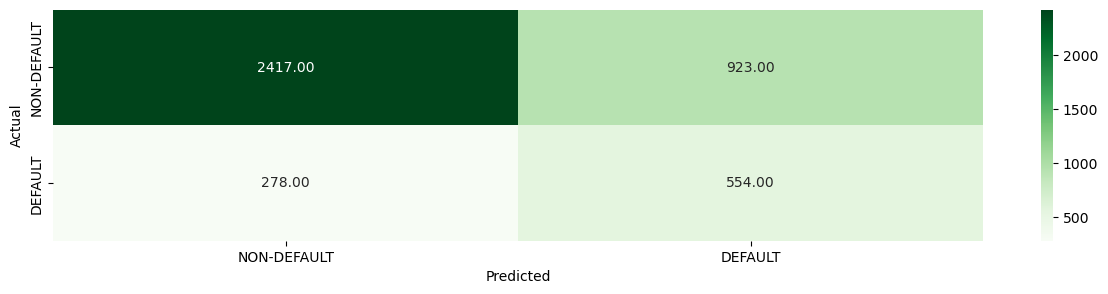

,Precision,Recall,F1-Score
Non-Default,0.896846,0.723653,0.800994
Default,0.375085,0.665865,0.479861


In [56]:
#Check model performance on training data
performance_df=model_performance(y_train, y_train_pred)
performance_df

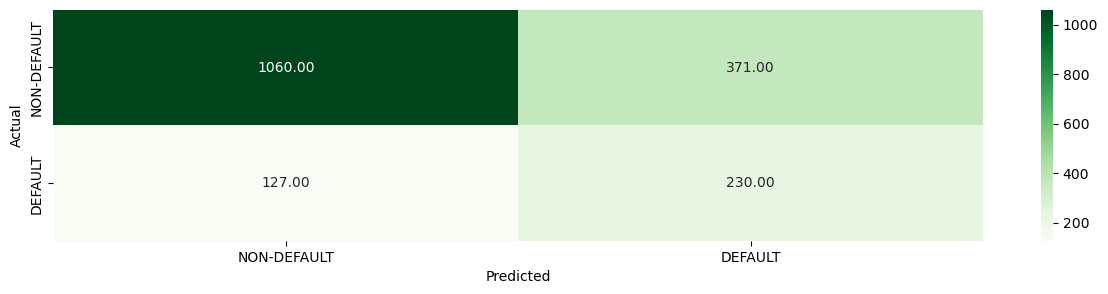

,Precision,Recall,F1-Score
Non-Default,0.893008,0.740741,0.809778
Default,0.382696,0.644258,0.480167


In [57]:
#Check the performance on the test data
model_performance(y_test, y_test_pred)

In [58]:
#Check the coefficeints in the logistic regression
coeff_features =logreg.coef_
coeff_df =pd.DataFrame(coeff_features, columns=X_train_scaled.columns)
coeff_df.T.sort_values(by=0, ascending=False)

,0
DEROG,3.590250
DELINQ,3.039855
NINQ,1.923191
JOB_Sales,0.676398
JOB_Self,0.564940
REASON_HomeImp,0.240000
JOB_ProfExe,-0.092347
JOB_Other,-0.093037
CLNO,-0.111296
DEBTINC,-0.127290


<font color='blue'>Basic Logistic Regression</font>
*   Same metrics are observed across both training and test data, so logistic regression is neither underfitting or overfitting the data
*   However, precision value is pretty low across train and test of only ~38% across both the datasets, it means this model can potentially reject many clients who might not default afterall.
* Logisitc regression model is sensitive to outliers as well as the method of imputing the data
* Top 3 features chosen by logistic regression models when imputed using median are number of delinquent credit lines, debt-to-income ratio and number of major derogatory reports, which is consistent with empirical multivariate analysis. Also oldest age of credit line is one of the critical features that has negative correlation with the default rate
* Top 3 features chosen by logistic regression models when imputed using KNN are number of delinquent credit lines, number of recent inquiries and number of major derogatory reports.



### Decision Tree

In [59]:
#Build decision tree model and fit it on the training data
model_dt = DecisionTreeClassifier(class_weight='balanced', random_state=7)
model_dt.fit(X_train, y_train)

#Predict using decision tree on train and test data
y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)

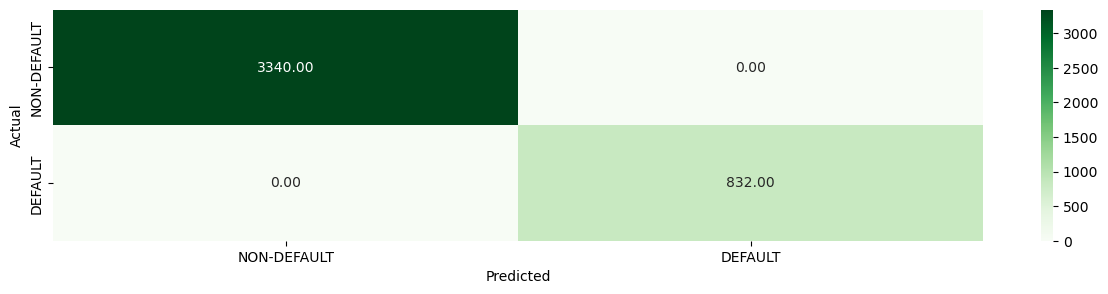

,Precision,Recall,F1-Score
Non-Default,1.0,1.0,1.0
Default,1.0,1.0,1.0


In [60]:
#Check the performance of the decision tree on training data
model_performance(y_train, y_train_pred_dt)

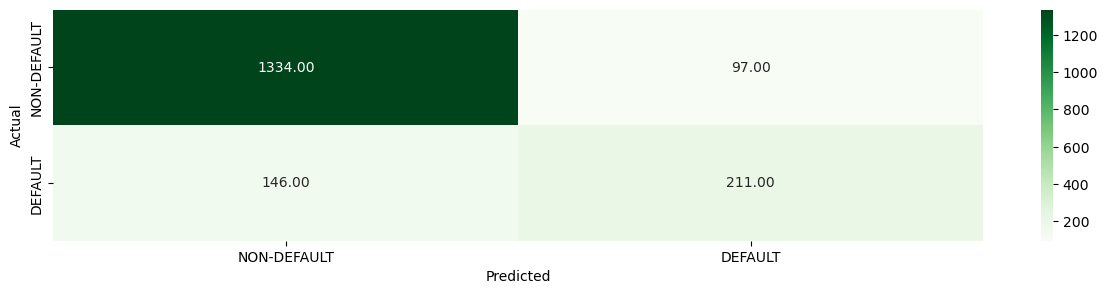

,Precision,Recall,F1-Score
Non-Default,0.901351,0.932215,0.916524
Default,0.685065,0.591036,0.634586


In [61]:
#Check the performance of the decision tree on test data
model_performance(y_test, y_test_pred_dt)

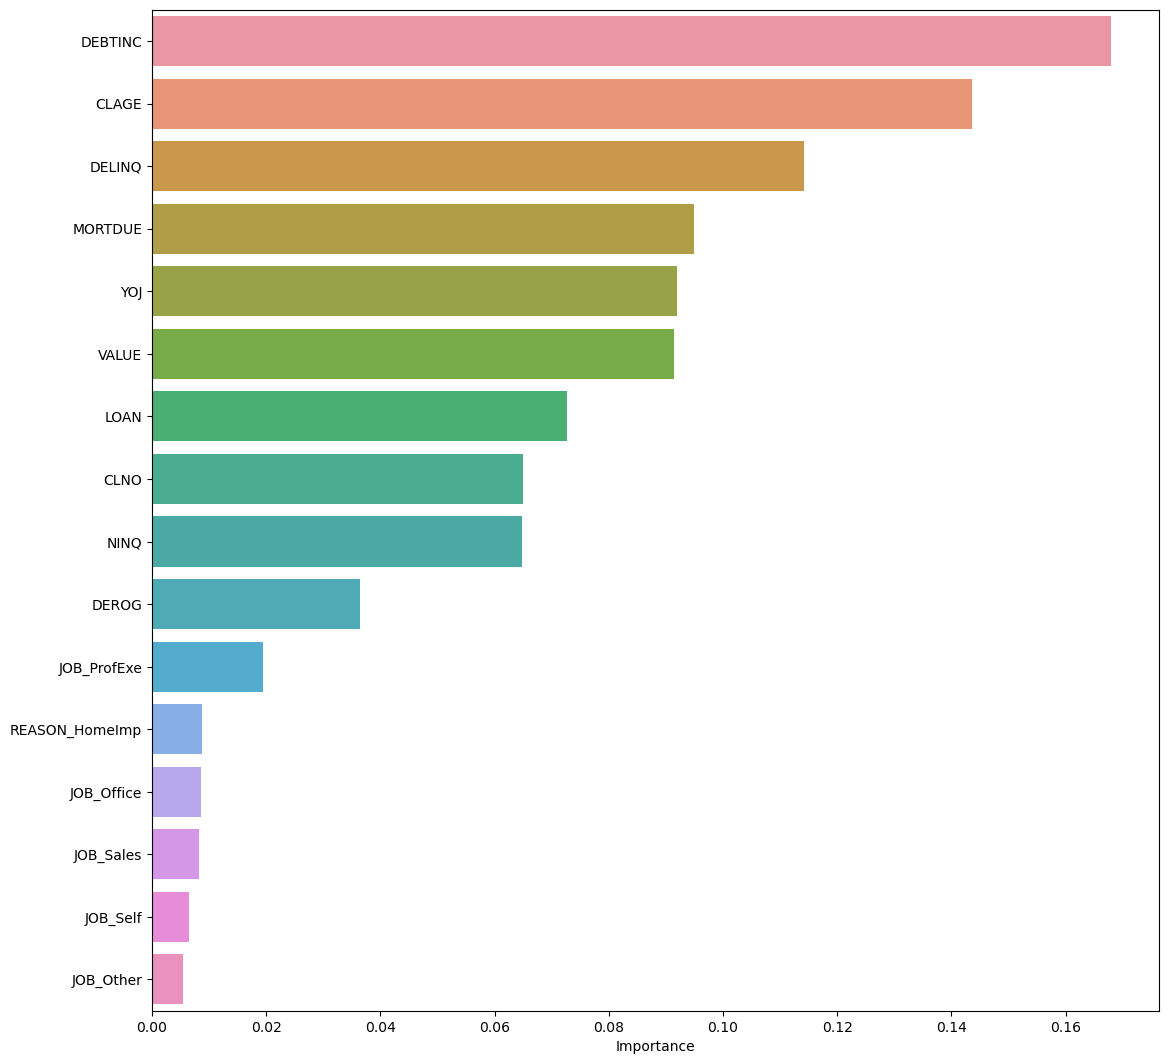

In [62]:
# Plot the feature importance using decision tree
importances = model_dt.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index);

<font color='blue'>Base Decision Tree</font>
*   Base decision tree clearly overfits the training data
*   Top 3 features in the base decision tree are debt-to-income ratio, credit age and number of deliquent lines



### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [63]:
#Build a dictionary for paramters to be tuned
dt_parms = {'criterion': ["gini", "entropy"],
           'max_depth': [None, 1, 2, 3, 4, 5],
           'min_samples_leaf': [ 5, 10],
            }
dt_cv = GridSearchCV(model_dt, dt_parms, cv=10)


In [64]:
#Search for the best decision tree
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10]})

In [65]:
#Get the best tuned decision tree model
model_dt_tuned= dt_cv.best_estimator_
model_dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=7)

In [66]:
#Predict on train and test data using tuned decision tree
y_train_pred_dt_tuned = model_dt_tuned.predict(X_train)
y_test_pred_dt_tuned = model_dt_tuned.predict(X_test)

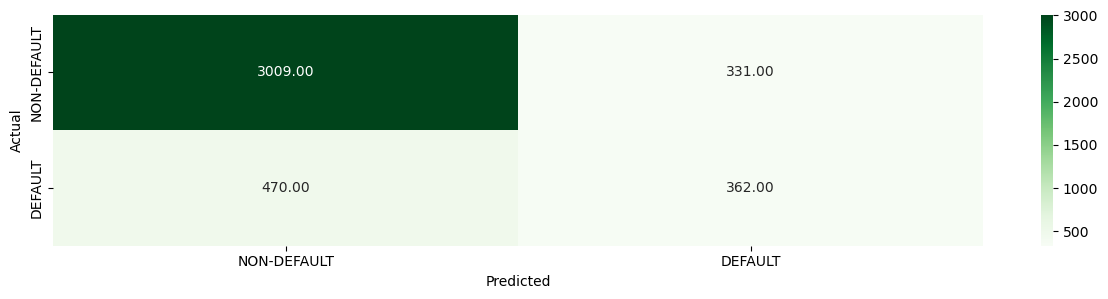

,Precision,Recall,F1-Score
Non-Default,0.864904,0.900898,0.882534
Default,0.522367,0.435096,0.474754


In [67]:
# Model performance on train data using tuned decision tree
model_performance(y_train, y_train_pred_dt_tuned)

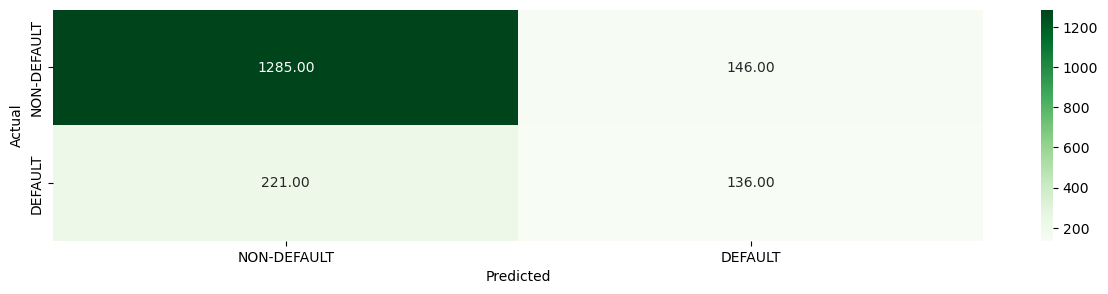

,Precision,Recall,F1-Score
Non-Default,0.853254,0.897973,0.875043
Default,0.482270,0.380952,0.425665


In [68]:
# Model performance on test data using tuned decision tree
model_performance(y_test, y_test_pred_dt_tuned)

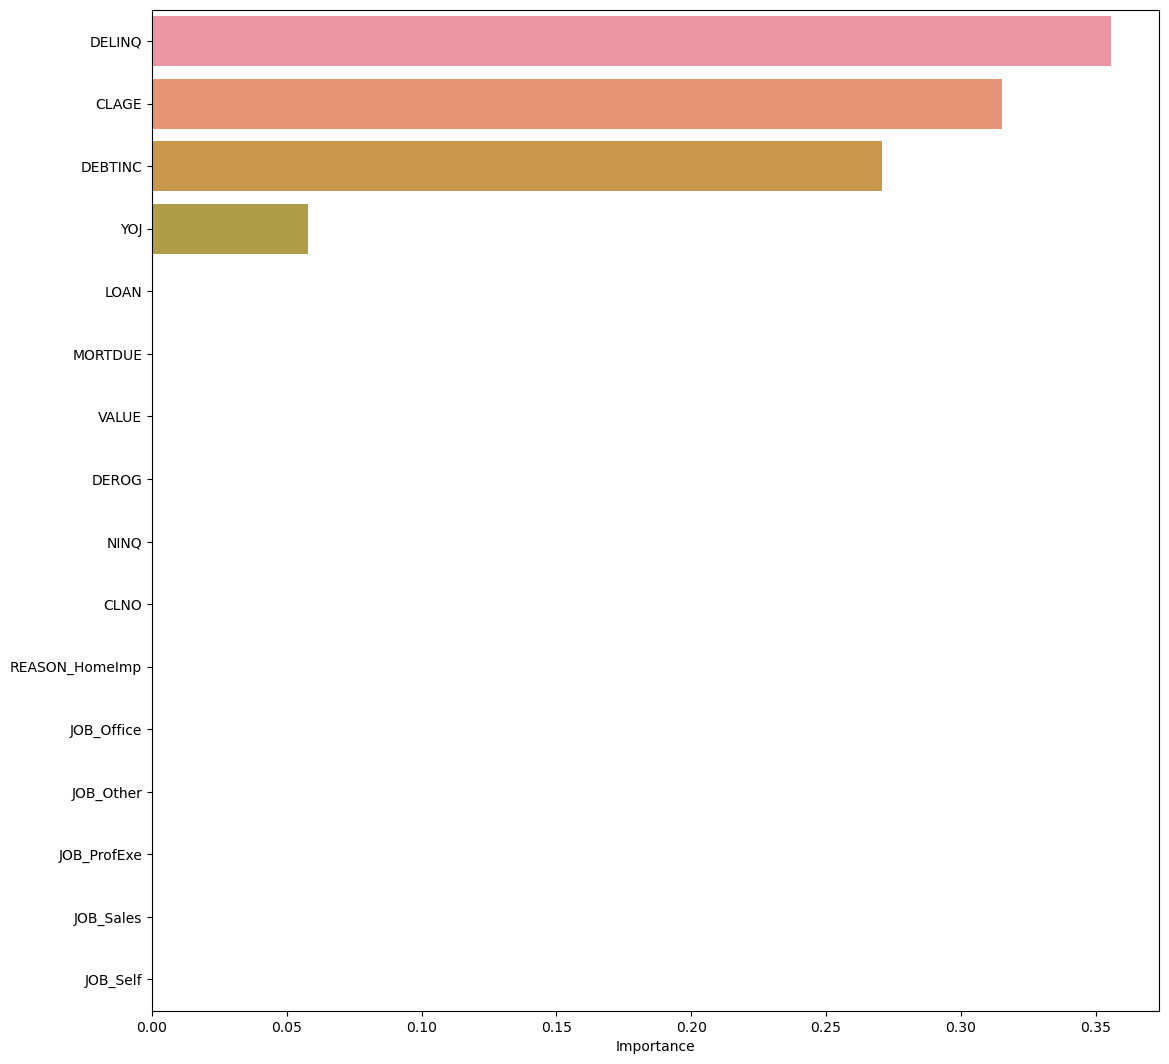

In [69]:
# Plot the feature importance using tuned decision tree
importances = model_dt_tuned.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index);

In [70]:
# Draw tune decision tree

#from sklearn import tree

#features = list(X_train.columns)

#plt.figure(figsize = (30, 20))

#tree.plot_tree(model_dt_tuned, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

#plt.show()

InvalidParameterError: The 'class_names' parameter of plot_tree must be an instance of 'list' or None. Got True instead.

<Figure size 3000x2000 with 0 Axes>

<font color='blue'>Tuned Decision Tree</font>
*   Same performance is observed across training and test dataset, which means tuned decision tree is neither underfitting or overfitting the data
*   Top 4 features in the tuned decision tree are debt-to-income ratio, credit age , number of deliquent lines and years in job.
* Tree is pruned at the depth of 3


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [71]:
#Build a random forest classifier model
model_rf=RandomForestClassifier(class_weight='balanced', random_state=7)
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=7)

In [72]:
#Predict on train and test data using random forest
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

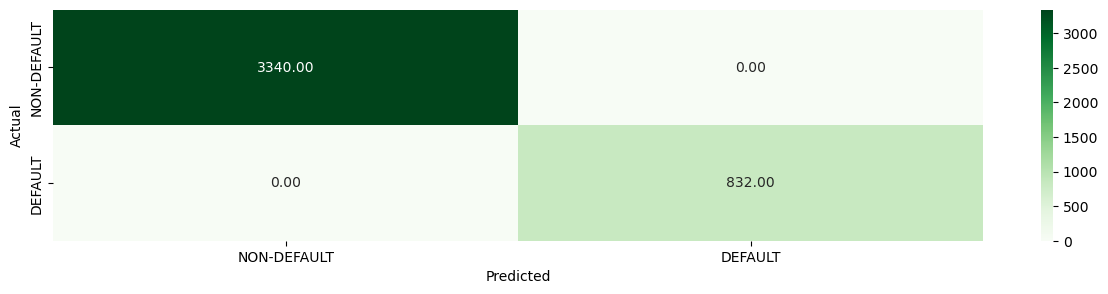

,Precision,Recall,F1-Score
Non-Default,1.0,1.0,1.0
Default,1.0,1.0,1.0


In [73]:
model_performance(y_train, y_train_pred_rf)

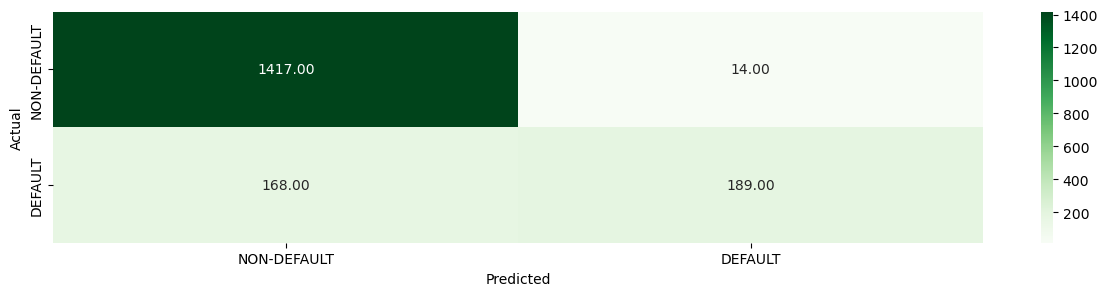

,Precision,Recall,F1-Score
Non-Default,0.894006,0.990217,0.939655
Default,0.931034,0.529412,0.675000


In [74]:
model_performance(y_test, y_test_pred_rf)

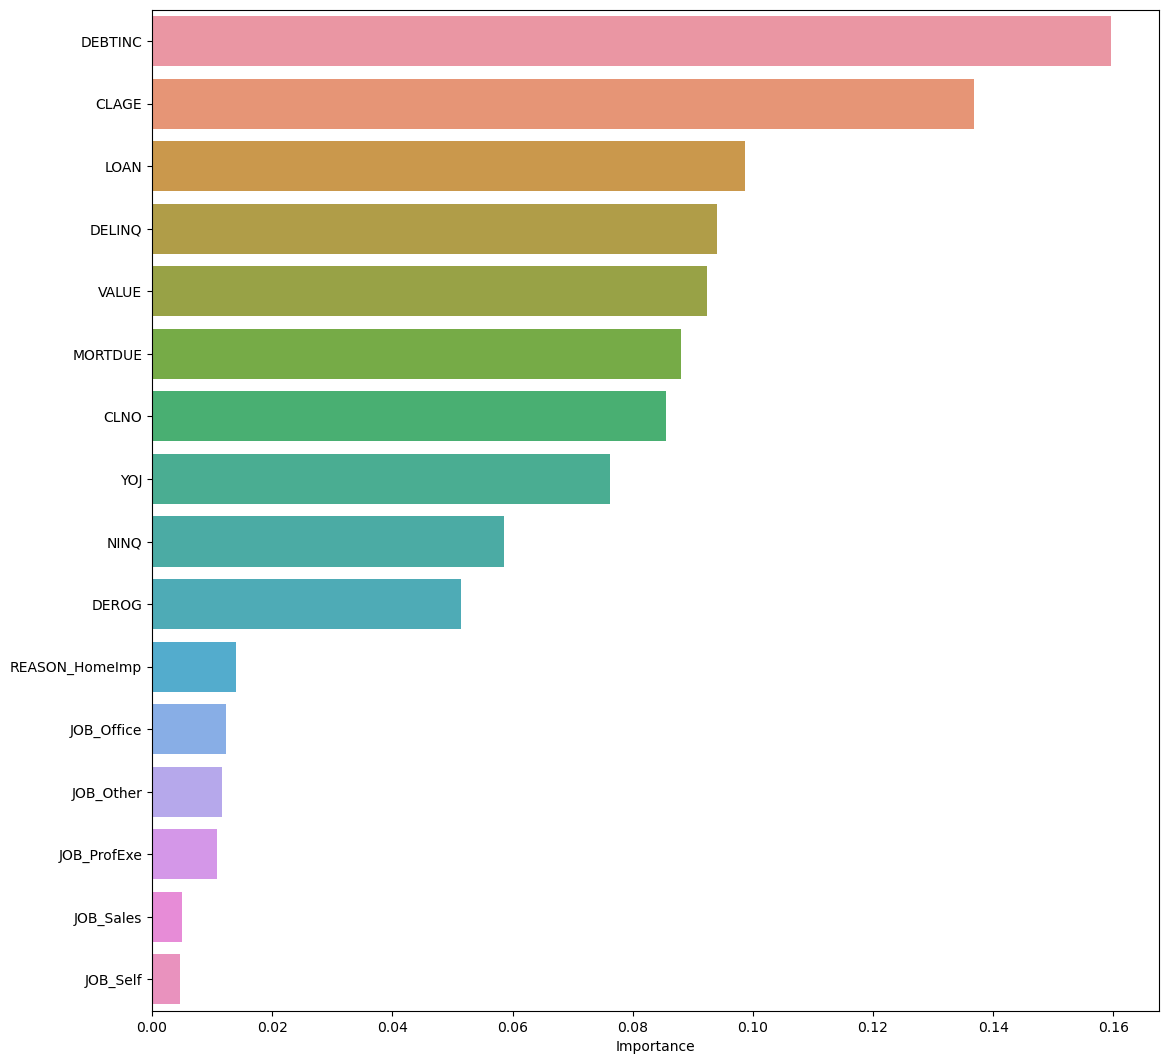

In [75]:
# Plot the feature importance using random forest
importances = model_rf.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index);

### **Random Forest Classifier Hyperparameter Tuning**

In [76]:
#Build a dictionary for paramters to be tuned
rf_parms = {'n_estimators': [100,250,500],
            'criterion': ["gini", "entropy"],
             'min_samples_leaf': [1,5, 10],
            "max_features": [0.7, 0.9, 'auto']
            }
rf_cv = GridSearchCV(model_rf, dt_parms, cv=10)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10]})

In [77]:
# Search and fit using best random forest classifier
model_rf_tuned= rf_cv.best_estimator_
model_rf_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=5, random_state=7)

In [78]:
#Predict using tuned random forest
y_train_pred_rf_tuned = model_rf_tuned.predict(X_train)
y_test_pred_rf_tuned = model_rf_tuned.predict(X_test)

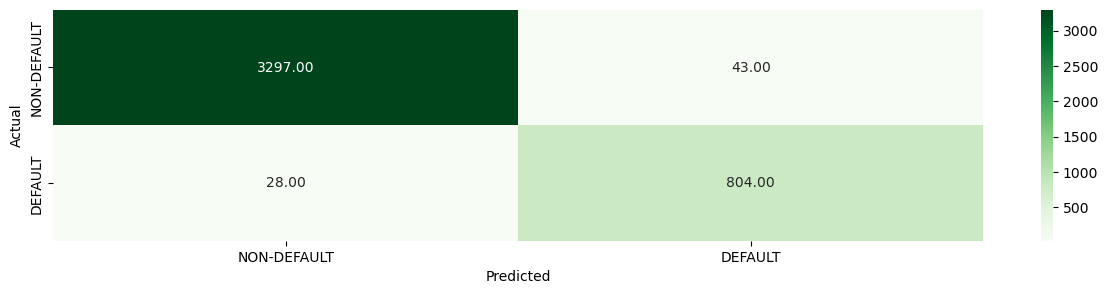

,Precision,Recall,F1-Score
Non-Default,0.991579,0.987126,0.989347
Default,0.949233,0.966346,0.957713


In [79]:
# Tuned Random Forest performance on train data
model_performance(y_train, y_train_pred_rf_tuned)

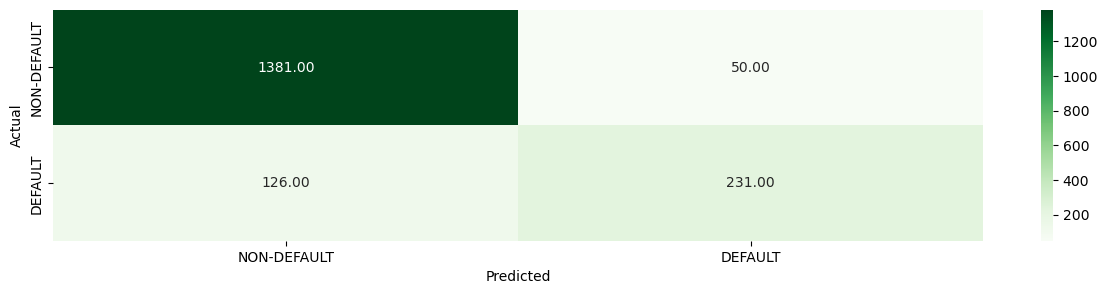

,Precision,Recall,F1-Score
Non-Default,0.916390,0.965059,0.940095
Default,0.822064,0.647059,0.724138


In [80]:
# Tuned Random Forest performance on test data
model_performance(y_test, y_test_pred_rf_tuned)

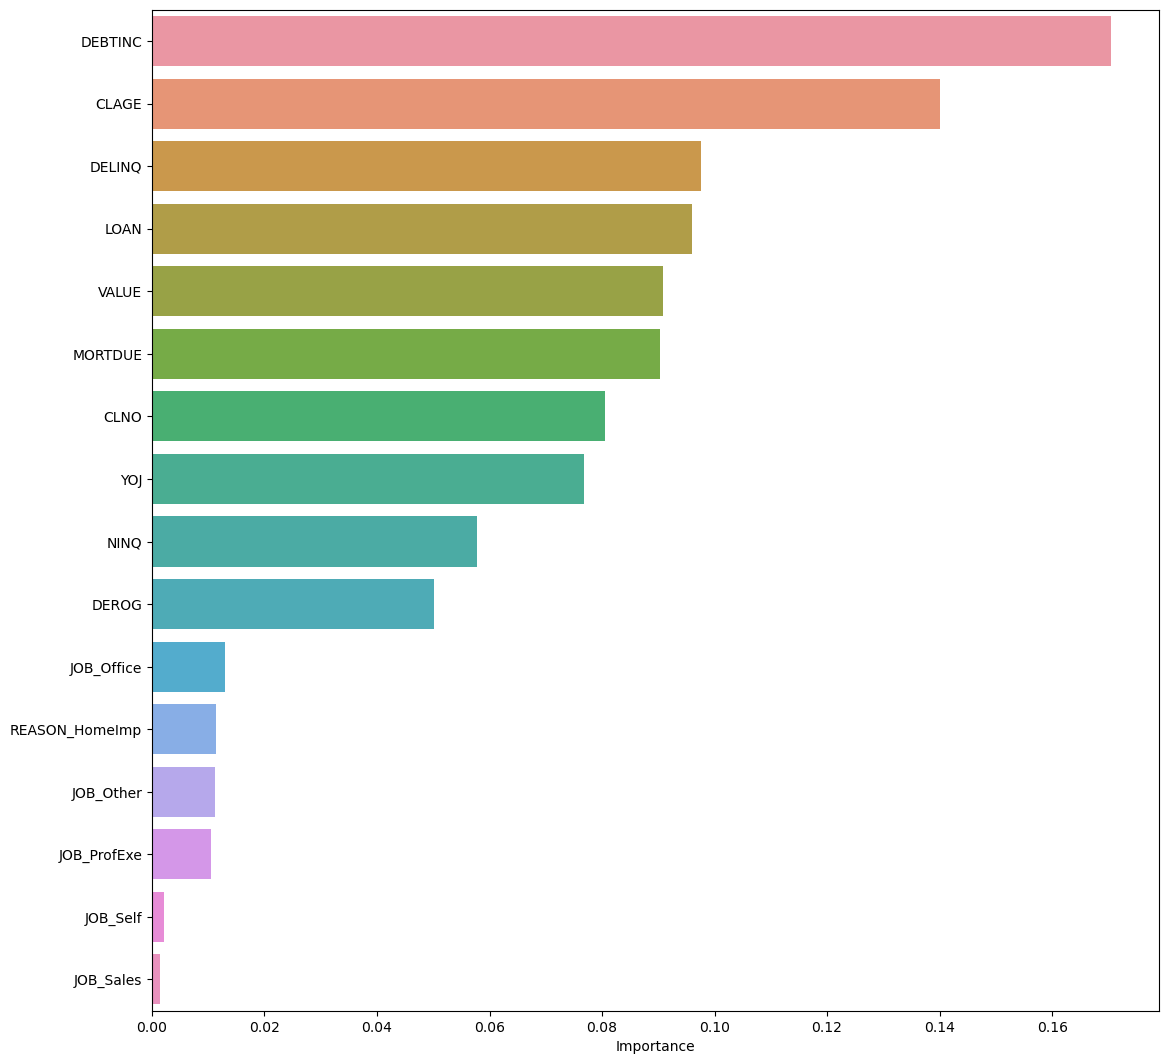

In [81]:
# Plot the feature importance using tuned random forest
importances = model_rf_tuned.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index);

<font color='blue'>Base and Tuned Random Forest</font>
* Base Random Forest overfits the data
* Though tuned random forest gives good performance on test data overall, it still seems to overfit the training data with very high metrics for the training data

# <font color='Blue'>Problem Statement and Context </font>
*   A bank's consumer credit department wants to simply the loan approval process for home equity loans
*   Its important for bank to predict which clients can default and which won't default so that it can approve or reject loans accordingly
*  Bank wants to automate this process and use data science to build a classification model to identify which clients are likely to default
*  Its important to reduce error of wrongully rejecting clients for loans (reduct false positives) as well as approving loans for clients who can default (reducing false negatives).
* Wrongfully rejecting a client and approving loan for a wrong client both will impact the revenue and profit for bank earned through interest income. While both are important, approving loan for a wrong client could be more detrimental and bank can fall of liquidity to fund its own operations.




**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

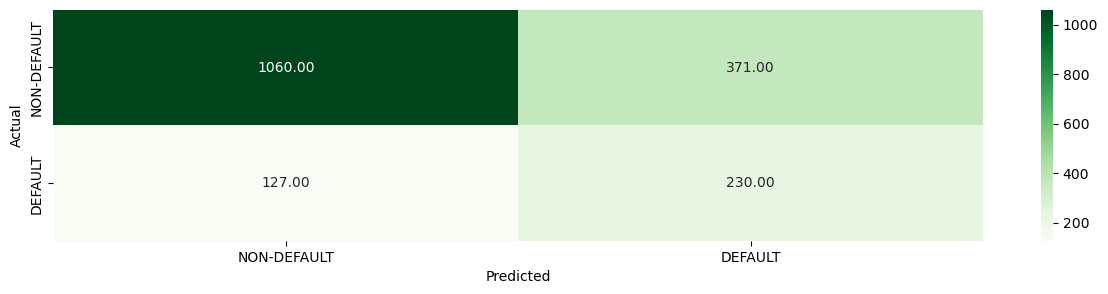

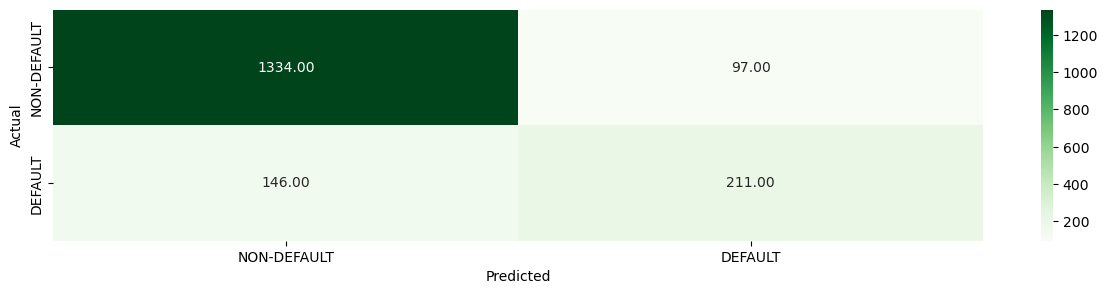

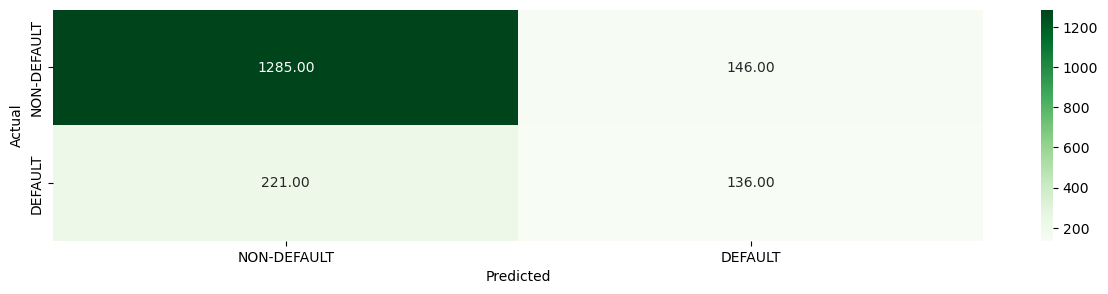

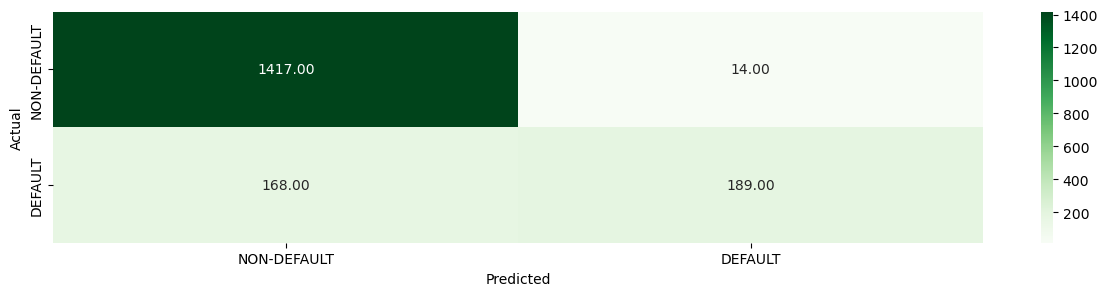

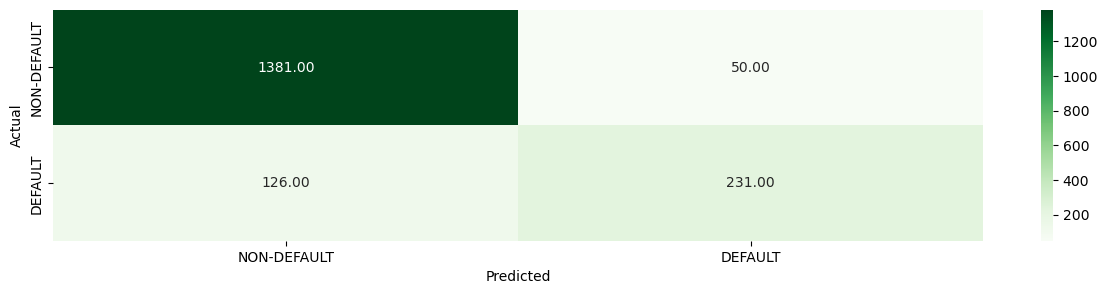

In [82]:
#Compile model performance from all 5 models using the test data
logreg_perf_df = model_performance(y_test, y_test_pred)
dt_perf_df = model_performance(y_test, y_test_pred_dt)
dt_tuned_perf_df = model_performance(y_test, y_test_pred_dt_tuned)
rf_perf_dt = model_performance(y_test, y_test_pred_rf)
rf_tuned_perf_df = model_performance(y_test, y_test_pred_rf_tuned)

In [83]:
pd.DataFrame([logreg_perf_df.loc['Default',:], dt_perf_df.loc['Default',:], dt_tuned_perf_df.loc['Default',:], rf_perf_dt.loc['Default',:], rf_tuned_perf_df.loc['Default',:]],
             index=['Logistic Regression', 'Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Tuned Random Forest'])

,Precision,Recall,F1-Score
Logistic Regression,0.382696,0.644258,0.480167
Decision Tree,0.685065,0.591036,0.634586
Tuned Decision Tree,0.482270,0.380952,0.425665
Random Forest,0.931034,0.529412,0.675000
Tuned Random Forest,0.822064,0.647059,0.724138


<font color='blue'>Summary of all models</font>
*   Logistic regression is sensitive to both outliers and method of imputing the missing data
*   However, after filling missing values and treating outliers, logistic regression gives most consistent performance across training and test data, however precision is quite low of only 38%-45% (Depending upon method of imputing), means this model will give more wrong rejections.
* When missing data is imputed with simple imputer of median values, all decision trees and random forest models (including tuned hyperparamaters), overfits the model on training data
* When missing data is imputed using KNN method, tuned decision tree gives consistent performance across training and test data, however, recall value is quite low of only 38%. Base decision tree and random forest models continues to overfit the model when KNN imputing is used.



**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

<font color='blue'> Top features </font>
*   Debt-to-income ratio is top driving factor for approving or rejecting a loan.  A client with a higher debt-to-income ratio beyond a certain ratio has a high probability of defaulting. However, this dataset has maximum number of missing values for debt-to-income ratio, making models sensitive to it and impacting models performance on test dataset
*   Number of major derogatory reports, number of delinquent lines and credit age are other top factors impacting default rate. This makes sense as a customer will shorter credit history and some bad credit events are more likely to default in future as well.



**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

<font color='blue'> Final Solution </font>
*   There are 2 potential models to be recommened to the credit department of the bank - logistic regression and tuned decision tree imputed with KNN
*   Logistic regression is the best model to avoid overfitting or underfitting the model. Its performance is not dependent on the method of imputing. Top features as determined by regression coefficients are debt-to-income ratio, number of derogatory reports, number of deliquent lines and number of recent inquires, which can be used to justify rejections to clients
* However, if management prefers to deploy a simpler model and also explainable visually, then tuned decision tress is a good 2nd candidate. It has only 3 features -number of deliquent lines , debt-to-income ratio, and credit age.
* However, tuned decision tree needs to be imputed with KNN method, otherwise it will overfit the training data.
* Tuned decision tree also has a lower recall, means more clients can potentially default than predicted by model, so bank has to ask for additional resources from clients when approving loans using this model.

